# Machine Learning - Fourth Assignment - Deep Learning

Thomas Bründl

se21m032

1524401

<br>
<br>
<br>


The goal of this exercise was to experiment with different Deep Learning approaches.

This document was inspired by Thomas Lidy who used a similar architecture approach for Deep Learning Car Recognition.

His work can be found under: https://github.com/tuwien-musicir/DeepLearning_Tutorial/blob/master/Car_recognition.ipynb.

## Dataset

For this exercise, I have chosen the CIFAR-10 dataset.

CIFAR-10 - Link: https://www.cs.toronto.edu/~kriz/cifar.html

The dataset is comprised of 60000 images. Each image has a resolution of 32 x 32 and a 3-color spectrum.
The test batch contains exactly 1000 randomly-selected images from each class (10000 test images).
The training batches contain exactly 5000 images from each class.

There exist 10 classes:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

The classes are completely mutually exclusive.

# Deep Learning approaches

## 1. Fully Connected Neural Network

The NN was trained with 50000 images. As loss funtion "categorical_crossentropy" was choosen since multiple classes shall be predicted. 
As batch size 32 and 10 epochs were selected.

I tried several combinations of neurons (128, 256, 512), hidden layers (1,2,3,4) and different activation functions (relu, sigmoid, softmax).

I found that there were significant differences regarding accuracy when it comes to activations functions (relu outperformed sigmoid).

The following combination worked best:

Four hidden layer with 256 neurons and a "relu" activation function.
For the output layer 10 neurons and "softmax" were chosen.

1. Hidden Layer (256 neurons)
2. Hidden Layer (256 neurons)
2. Hidden Layer (256 neurons)
2. Hidden Layer (256 neurons)
3. Output layer (10 neurons)

<b>Trainable params:</b> 986,634

This architecture achieved 0.6788 accuracy on the training set and 0.7131 accuracy on the test set.



## 2. Convolutional Neural Network

I used the convolution kernel Convolution2D that is convolved with the layer input to produce a tensor of outputs.
As parameter 64 filter and a kernel size of 3 x 3 pixel was selected. 

For hidden layers 128 neurons and "relu" as activation function was selected.
The output layer has 10 neurons and a "softmax" activation function.

After each hidden layer a dropout of 0.3 was applied to make the model more robust.

<b>Trainable params:</b> 4,832,842


### Result CNN

The CNN without data augmentation performed better than the one with data augmentation. 

On the train data an accuracy of 0.78 was achieved. 

But on the test data only an accuracy of 0.675 could be produced which indicates that the model might be overfitted.

### Result CNN with data augmentation

Although the CNN with data augmentation hat more training data the accuracy on train set (0.404) and on the test set (0.448) was quite low compared to the other approaches.


<br>
<br>

# Imports

In [1]:
import os
import pickle
import glob
import numpy as np
from PIL import Image
from IPython.display import display
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.metrics import Accuracy, Recall, Precision
from sklearn.metrics import accuracy_score
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization.batch_normalization import BatchNormalization

In [2]:
random_state = 1524401

# Load Images

In the first step the images are loaded from the five data_batch files and combined into one file.

Then the file is unpickled via the python 3 library pickle.py.

(“unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.)

https://docs.python.org/3/library/pickle.html





In [3]:
# The setting 'rb' is used to convert the byte stream (image file) into a byte-like object hierarchy.
def unpickle(file):
    byteObj = open(file, 'rb')
    imageObj = pickle.load(byteObj, encoding='bytes')
    return imageObj

In [4]:
# Read the data from the five data_batch files and join them into one file.
path = 'data/cifar-10-batches-py'
image_files = glob.glob(os.path.join(path, 'data_batch_*'))
print('Imported ' + str(len(image_files)) + ' files')

Imported 5 files


### Training data

In [5]:
# Create a dictionary for training purposes that contains all 50000 images with their respective labels and filenames.

empty_image_array = np.empty([0, 3072], dtype=np.ubyte)
image_data = {b'image_array': empty_image_array,
              b'image_labels': [],
              b'image_filenames': []
              }

for image_file in image_files:    
    image_data_unpickled = unpickle(image_file)

    image_data[b'image_filenames'].extend(image_data_unpickled[b'filenames'])
    image_data[b'image_array'] = np.append(image_data[b'image_array'], image_data_unpickled[b'data'], axis=0)
    image_data.get(b"image_labels").extend(image_data_unpickled[b'labels'])

print('Image import successful!')
print('image_array: ' + str(len(image_data[b'image_array'])) +     '   image_labels: ' + str(len(image_data[b'image_labels'])) +      '   image_filenames: ' + str(len(image_data[b'image_filenames']))  )

print('One image contains ' + str(len(image_data[b'image_array'][0])) + ' data points.')
print('32 x 32 = 1024   -->   1024 x 3 colorChangels = 3072      (colorChangels = red, green, blue)')

Image import successful!
image_array: 50000   image_labels: 50000   image_filenames: 50000
One image contains 3072 data points.
32 x 32 = 1024   -->   1024 x 3 colorChangels = 3072      (colorChangels = red, green, blue)


The image_array is comprised of 50000 images. Each image consists of 1024 pixel (32x32 = 1024) and has three different colors (red, green, blue).

Therefore, each image has 3072 data points.

### Testing data

In [6]:
# Create a dictionary for testing purposes that contains all 50000 images with their respective labels and filenames.

empty_image_array = np.empty([0, 3072], dtype=np.ubyte)
image_test_data = {b'image_array': empty_image_array,
              b'image_labels': [],
              b'image_filenames': []
              }

file_test_data = unpickle('data/cifar-10-batches-py/test_batch')

image_test_data[b'image_filenames'].extend(file_test_data[b'filenames'])
image_test_data[b'image_array'] = np.append(image_test_data[b'image_array'], file_test_data[b'data'], axis=0)
image_test_data.get(b"image_labels").extend(file_test_data[b'labels'])

print("Groundtruth Statistics (Testing Data):")
for v in set(image_test_data.get(b"image_labels")):
    print("Label", v, ":", image_test_data.get(b"image_labels").count(v))



Groundtruth Statistics (Testing Data):
Label 0 : 1000
Label 1 : 1000
Label 2 : 1000
Label 3 : 1000
Label 4 : 1000
Label 5 : 1000
Label 6 : 1000
Label 7 : 1000
Label 8 : 1000
Label 9 : 1000


### Display first 10 images

image_label:  6


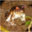

image_label:  9


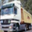

image_label:  9


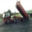

image_label:  4


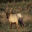

image_label:  1


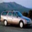

image_label:  1


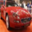

image_label:  2


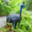

image_label:  7


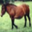

image_label:  8


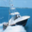

image_label:  3


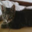

In [7]:
for index, show_images in enumerate(image_data[b'image_array'][:10]): 
    red = np.asarray(np.split(show_images[0:1024], indices_or_sections=32))
    green = np.asarray(np.split(show_images[1024:2048], indices_or_sections=32))
    blue = np.asarray(np.split(show_images[2048:3072], indices_or_sections=32))
    red_image = Image.fromarray(red)
    green_image = Image.fromarray(green)
    blue_image = Image.fromarray(blue)
    image = Image.merge('RGB', (red_image, green_image, blue_image))
    print('image_label: ', image_data.get(b"image_labels")[index])
    display(image)

### Create the Groundtruth based on filenames

In [8]:
# look at the first 25 classes
labels_to_print = 25
print('First ' + str(labels_to_print) + ' labels:')
print(image_data.get(b"image_labels")[0:labels_to_print])

print ("\nGroundtruth Statistics (Training Data):")
for v in set(image_data.get(b"image_labels")):
    print("Class " + str(v) + ": " + str(image_data.get(b"image_labels").count(v)))

image_categories = np_utils.to_categorical(image_data.get(b"image_labels"))

print(image_categories)

First 25 labels:
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2]

Groundtruth Statistics (Training Data):
Class 0: 5000
Class 1: 5000
Class 2: 5000
Class 3: 5000
Class 4: 5000
Class 5: 5000
Class 6: 5000
Class 7: 5000
Class 8: 5000
Class 9: 5000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


# Standardization

In [9]:
image_data[b'image_array'].min(), image_data[b'image_array'].max()

(0, 255)

In [10]:
mean = image_data[b'image_array'].mean()
stddev = image_data[b'image_array'].std()
mean, stddev

(120.70756512369792, 64.1500758911213)

In [11]:
images_std = (image_data[b'image_array'] - mean) / stddev
images_std = np.array(images_std, dtype=float)
images_std.mean(), images_std.std()

(-2.5247951877342226e-17, 1.0000000000000022)

In [12]:
image_data[b'image_array'].min(), image_data[b'image_array'].max()

(0, 255)

# Creating NN Models in Keras

## 1. Fully Connected NN

In [13]:
print (image_data[b'image_array'].shape)

(50000, 3072)


In [14]:
# find out input shape for NN, which is just a long vector
input_shape = image_data[b'image_array'].shape[1]
print ("Input shape: " , input_shape)

Input shape:  3072


### Creating a Model

In [15]:
# simple Fully-connected network

# neurons = 128
neurons = 256
# neurons = 512

# hidden_layer_activation = 'sigmoid'
hidden_layer_activation = 'relu'

output_layer_activation = 'sigmoid'
output_layer_activation = 'softmax'


model = Sequential()

model.add(Dense(neurons, input_dim=input_shape))

model.add(Dense(neurons, activation=hidden_layer_activation))
model.add(Dense(neurons, activation=hidden_layer_activation))
model.add(Dense(neurons, activation=hidden_layer_activation))


model.add(Dense(10,activation=output_layer_activation))  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 986,634
Trainable params: 986,634
Non-trainable params: 0
_________________________________________________________________


### Defining Loss Function and Optimizer Strategy: Gradient Descent

In [16]:
# Define a loss function 
loss = 'categorical_crossentropy'  # 'categorical_crossentropy' for multi-class problems

# Optimizer = Stochastic Gradient Descent
optimizer = 'sgd' 

# Compiling the model
model.compile(loss=loss, optimizer=optimizer,  metrics=['accuracy','mse'])

### Training the model on the input dataset

In [17]:
# fixed batch size and epochs
batch_size = 32
epochs = 10

In [18]:
# train the model
model.fit(images_std, image_categories, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6874 - accuracy: 0.4054 - mse: 0.0730
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4606 - accuracy: 0.4878 - mse: 0.0652
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3503 - accuracy: 0.5276 - mse: 0.0611
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2701 - accuracy: 0.5558 - mse: 0.0581
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1964 - accuracy: 0.5812 - mse: 0.0552
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1338 - accuracy: 0.6040 - mse: 0.0527
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0725 - accuracy: 0.6266 - mse: 0.0501
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0175 - accuracy: 0.6464 - mse: 0.0478
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - lo

In [19]:
# verify Accuracy on Train set
train_predictions = model.predict(images_std)
accuracy_score( np.array(image_data.get(b"image_labels")), np.argmax(train_predictions, axis=1))

1563/1563 [==============================] - 3s 2ms/step


0.7218

### Standardize Test Set

In [20]:
print("Mean Train Set: " +  str(round(image_test_data[b'image_array'].mean(), 6))  + "     Standard Deviation Train Set: " +  str(round(image_test_data[b'image_array'].std(), 6)))
test_images_std = (image_test_data[b'image_array'] - mean) / stddev
print("Mean Test Set: " +  str(round(test_images_std.mean(), 6))  + "     Standard Deviation Test Set: " +  str(round(test_images_std.std(), 6)))


Mean Train Set: 121.529155     Standard Deviation Train Set: 64.06097
Mean Test Set: 0.012807     Standard Deviation Test Set: 0.998611


### Make Predictions

In [21]:
# verify accuracy on test set
test_predictions = model.predict(test_images_std)
accuracy_on_test_set = accuracy_score(np.array(image_test_data[b'image_labels']),  np.argmax(test_predictions, axis=1))
print('Test-set Accuracy: ' + str(accuracy_on_test_set))

313/313 [==============================] - 1s 2ms/step
Test-set Accuracy: 0.5245


## 2. CNN (Convolutional Neural Network)


In [22]:
n_channels = 3 # for grey-scale, 3 for RGB, but usually already present in the data
keras.backend.set_image_data_format('channels_last')
train_img = images_std.reshape(images_std.shape[0], 32, 32, n_channels)
test_img = test_images_std.reshape(test_images_std.shape[0], 32, 32, n_channels)

In [23]:
print(train_img.shape)
print(test_img.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [24]:
# we store the new shape of the images in the 'input_shape' variable.
# take all dimensions except the 0th one (which is the number of images)
    
input_shape = train_img.shape[1:]  
input_shape

(32, 32, 3)

## Create the CNN model

In [25]:
unique_image_categories = set(image_data.get(b"image_labels"))

def createMyModel(hidden_layer_amount, dropOut):
    
    model = Sequential()

    # Layer 1
    print('Layer 1')
    model.add(Convolution2D(64, (3,3), input_shape=input_shape, activation='relu'))

    model.add(BatchNormalization())

    for index in range(hidden_layer_amount):
        print("Layer " + str(index +2))
        model.add(Convolution2D(64, (3,3), activation='relu'))
        model.add(Dropout(dropOut))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(len(unique_image_categories), activation='softmax'))

    return model


In [26]:
hidden_layer_amount = 3
dropOut = 0.3
model = createMyModel(hidden_layer_amount, dropOut)
print("dropOut: ", dropOut)

model.summary()

Layer 1
Layer 2
Layer 3
Layer 4
dropOut:  0.3
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 64)        0         
        

### Train the CNN

In [27]:
# Compiling the model
loss = 'categorical_crossentropy' 
optimizer = 'sgd' 
#optimizer = SGD(lr=0.001)  # possibility to adapt the learn rate

model.compile(loss=loss, optimizer=optimizer,  metrics=['accuracy','mse'])

In [28]:
history = model.fit(train_img, image_categories, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 288s 184ms/step - loss: 1.5930 - accuracy: 0.4263 - mse: 0.0706
Epoch 2/10
1563/1563 [==============================] - 294s 188ms/step - loss: 1.3036 - accuracy: 0.5380 - mse: 0.0598
Epoch 3/10
1563/1563 [==============================] - 292s 187ms/step - loss: 1.1655 - accuracy: 0.5891 - mse: 0.0541
Epoch 4/10
1563/1563 [==============================] - 290s 186ms/step - loss: 1.0626 - accuracy: 0.6261 - mse: 0.0497
Epoch 5/10
1563/1563 [==============================] - 290s 186ms/step - loss: 0.9731 - accuracy: 0.6568 - mse: 0.0459
Epoch 6/10
1563/1563 [==============================] - 295s 189ms/step - loss: 0.8959 - accuracy: 0.6862 - mse: 0.0425
Epoch 7/10
1563/1563 [==============================] - 303s 194ms/step - loss: 0.8250 - accuracy: 0.7112 - mse: 0.0395
Epoch 8/10
1563/1563 [==============================] - 305s 195ms/step - loss: 0.7516 - accuracy: 0.7339 - mse: 0.0364
Epoch 9/10
1563/1563 [==================

### Verifying Accuracy on Test Set

In [29]:
predictions = model.predict(test_img)
predicted_classes = np.argmax(predictions, axis=1)
accuracy_test_set = accuracy_score(np.array(image_test_data.get(b"image_labels")), predicted_classes)
print('Test Set Accuracy: ' + str(accuracy_test_set))

313/313 [==============================] - 10s 32ms/step
Test Set Accuracy: 0.6751


### Plotting the Training Curve

In [30]:
hist = history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'mse'])

dict_keys(['loss', 'accuracy', 'mse'])


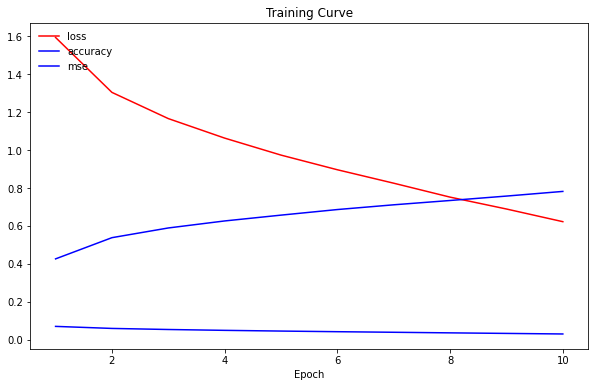

In [31]:
colors = {'loss':'r', 'accuracy':'b', 'mse':'b'}
plt.figure(figsize=(10,6))
plt.title("Training Curve") 
plt.xlabel("Epoch")

print(hist.keys())

for measure in hist.keys():
    color = colors[measure]
    plt.plot(range(1,epochs+1), hist[measure], color + '-', label=measure)  # use last 2 values to draw line

plt.legend(loc='upper left', scatterpoints = 1, frameon=False)

# Data Augmentation

In [32]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# recreate and recompile the model (otherwise we continue learning)
model = createMyModel(hidden_layer_amount, dropOut)
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy','mse'])

# fits the model on batches with real-time data augmentation:
history = model.fit(datagen.flow(train_img, image_categories, batch_size=batch_size),
                    epochs=epochs) 

Layer 1
Layer 2
Layer 3
Layer 4
Epoch 1/10
1563/1563 [==============================] - 290s 185ms/step - loss: 1.9937 - accuracy: 0.2628 - mse: 0.0830
Epoch 2/10
1563/1563 [==============================] - 278s 178ms/step - loss: 1.8507 - accuracy: 0.3175 - mse: 0.0793
Epoch 3/10
1563/1563 [==============================] - 293s 188ms/step - loss: 1.7772 - accuracy: 0.3461 - mse: 0.0771
Epoch 4/10
1563/1563 [==============================] - 290s 185ms/step - loss: 1.7207 - accuracy: 0.3701 - mse: 0.0753
Epoch 5/10
1563/1563 [==============================] - 286s 183ms/step - loss: 1.6720 - accuracy: 0.3891 - mse: 0.0736
Epoch 6/10
1563/1563 [==============================] - 285s 182ms/step - loss: 1.6294 - accuracy: 0.4031 - mse: 0.0722
Epoch 7/10
1563/1563 [==============================] - 288s 184ms/step - loss: 1.5914 - accuracy: 0.4186 - mse: 0.0709
Epoch 8/10
1563/1563 [==============================] - 276s 177ms/step - loss: 1.5628 - accuracy: 0.4295 - mse: 0.0698
Epoch 9/

### Verifying Accuracy on Test Set (with Data Augmentation)

In [33]:
# verify accuracy on test set with augmentation
predictions = model.predict(test_img)
predicted_classes = np.argmax(predictions, axis=1)
accuracy_on_test_set = accuracy_score(np.array(image_test_data.get(b"image_labels")), predicted_classes)
print('Accuracy on test set with augmentation: ' + str(accuracy_on_test_set))

313/313 [==============================] - 10s 31ms/step
Accuracy on test set with augmentation: 0.4591


### Plotting the Training Curve with Data Augmentation 

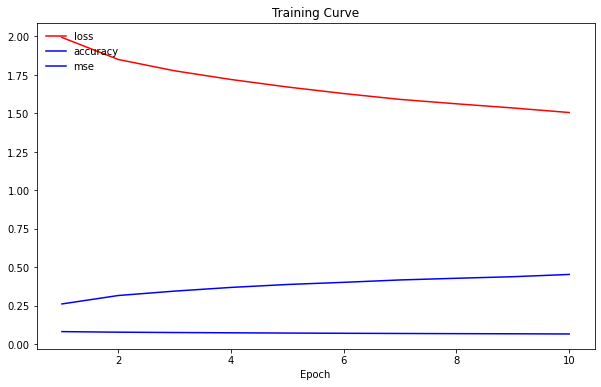

In [34]:
hist = history.history

plt.figure(figsize=(10,6))
plt.title("Training Curve") 
plt.xlabel("Epoch")

for measure in hist.keys():
    color = colors[measure]
    plt.plot(range(1,epochs+1), hist[measure], color + '-', label=measure)  # use last 2 values to draw line

plt.legend(loc='upper left', scatterpoints = 1, frameon=False)